<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/Instargram_Naver_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필수 모듈 호출
import pandas as pd
import numpy as np
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
word= '호캉스  호텔  힐링  독채숙소  독채  한옥  자연  오션뷰 외국 캠핑 바다 파티 럽스타 어메니티 빔프로젝트 빔 프로젝트 글램핑 풀빌라 노천탕 프라이빗 인피니티풀 루프탑 히노끼탕 히노끼 온수풀 수영장 숲속 숲 나무'

In [4]:
!pip install kiwipiepy # 한국어 형태소 분석기

     |████████████████████████████████| 495 kB 4.8 MB/s 
     |████████████████████████████████| 25.7 MB 63 kB/s 
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.10.0-py3-none-any.whl size=25882656 sha256=9067364e16c62637159a644deef41fe8c1998024372bd269e4f69967aa09ef8d
  Stored in directory: /root/.cache/pip/wheels/42/2f/c9/c82156eb15ed5ebb5475002723d1ab319947aca25bd663cd1d
Successfully built kiwipiepy-model


In [8]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
kiwi.add_user_word(word) #사용자 사전

True

In [7]:
! pip install tomotopy #호출
import tomotopy as tp
# !pip install kiwipiepy # 한국어 형태소 분석기
# from kiwipiepy import Kiwi
# kiwi = Kiwi()

In [57]:
# 데이터 로드

insta_data = pd.read_csv('tot_dataset.csv')

In [73]:
naver_data = pd.read_csv('total_blog_dataset.csv')

#전처리 함수 정의 및 불용어 리스트 생성

In [117]:
stop_words = '의 가 이 은 들 는 좀 잘 속초 걍 년대 과 했 경상북도 경기도 거 침실 거실 사용 커피 문 테이블 편하다 조명 쪽 따로 냉장고 거울 부엌 입구 수건 주차 불편 거리 식기 세면대 해서 게 찍 느낌 많이 리뷰 듯 뷰 박 링크 인스타그램 할인 성수기 홈페이지 주말 블로그 인원 추가 ㅎㅎ 너무 게스트 넘 하우스 드리다 이용 위치 쓰다 진짜 넘 찍 거 먹 ㅠㅠ ㅎㅎㅎ ㅠ 물 였 ㅠㅠㅠ ㅠㅠ ㅠ ㅋㅋㅋ ㅋㅋ ㅋ ㅎㅎㅎ ㅎㅎ ㅎ 화장실 도 뭐 오픈 최대 준비 룸 빵 거 많이 방법 달리 스럽다 특별자치도 를 에어비 으로 자 에 와 한 하다 아 휴 아이구 포스팅 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 이제 분 도움 여 ㅁ ㅎ ㄶ 얼마간 둥 오랜만 약간 체크 체크아웃 가격 정보 비 수기 평일 기준 약 전국  예약 되어다 스마트 빔 블루투스 스피커 이 외 드라이어 다리미 구비 되어다 있다 주방 음식 조리 가능하다 환기 제한 전남 제부도 있다 냄새 나 요리 삼가다 경주시 부탁드리다 후 번길 문의 다 가격 수기 비성수기 주소  좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 포항 우도 양양 전주시 통영 제천 여수시 순천 고성 합천 한림읍 전주 경북 구좌읍 돌산읍 태안 하동 포항시 제주시 밀양 양평 울산 무무 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 춘천 층 남해 스테이 서울 여수 거제 추천 경주 곳 객실 이다 강원도 강원 홍천 부산 영도 호 객실 교동 풀빌라 빌라 풀 스튜디오 펜션 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 감성 숙소 호텔 제주 제주도 강원도 강릉 속초 속초시 에어비앤비 명 생각 시간 그녀 수 약 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 사실 이렇 점 싶 말 정도 좀 원 잘 통하 ㅆ 재 채 독 롭 도란도 팅 감성비앤비 공간 참여 이벤트 당첨자 기간 부산 #부산숙소 #부산에어비앤비 #부산여행 경기 경주시 있는 한 #경주숙소 강원도 제주 제주시 #제주숙소 #제주감성숙소 #제주숙소추천 남해군 서면 춘천시 남해 광안리 편 반 안면도 산방산 님 사장 정말 날 꼭 찾다 직접 날 그냥 맘 근데 스타 욕 편 째 첫 맛 채 황리단 황리단길 미리 열다 거제도 공간 광안리 광안대교 스다 해운대 헤이 윤슬 울릉도 손 옆 홍보 입실시간 에디터' #불용어 리스트 형성

In [118]:
stop_words=stop_words.split(' ')

In [119]:
stop_location = pd.read_csv('location_words.csv')
stop_location.columns = ['index', 'location']
stop_location = stop_location.location.tolist()

In [120]:
stop = stop_words + stop_location
stop = pd.Series(stop)
stopwords = stop.unique().tolist()

In [121]:
def tokenize(sent):
    res, score = kiwi.analyze(sent)[0] # 첫번째 결과를 사용
    return [word + ('다' if tag.startswith('V') else '') # 동사에는 '다'를 붙여줌
            for word, tag, _, _ in res
            if not tag.startswith('E') and not tag.startswith('J') and not tag.startswith('S') and not tag.startswith('W') and word not in stopwords] # 조사, 어미, 특수기호 및 stopwords에 포함된 단어는 제거

In [122]:
#"""한글빼고 전부 제거"""
def sub_special(s):
  rs = re.sub(r'[^가-힣]',' ',s)
  rr = re.sub(' +', ' ', rs)
  return rr

In [123]:
#"""한글빼고 전부 제거"""
def sub_special_token(s):
  rs = re.sub(r'[^가-힣]',' ',s).strip().split()
  return rs

In [124]:
def word_cleansing(data): 
  for i in range(len(data)): #불용어 제거
    result = []
    for w in data.content[i]:
      if w not in stopwords:
        result.append(w)
    data.content[i] = result

## naver데이터 전처리

In [71]:
# 데이터 확인
naver_data

,content
0,"[여행, 다녀오다, 게으르다, 여행, 고민, 바라다, 올리다, 오늘, 리뷰, 편안,..."
1,"[다녀오다, 후기, 휴가, 틈나다, 호캉스, 다녀오다, 다녀오다, 주변, 아고다, ..."
2,"[여행, 고르다, 아무래도, 여행, 주제, 자체, 쉬, 편안, 쉬다, 중요, 부분,..."
3,"[오늘, 지나다, 휴가, 찐친, 다녀오다, 메이킷슬, 후기, 돈, 산, 인테리어, ..."
4,"[지인, 소개, 시우재, 마침, 이것저것, 기념일, 재다, 다녀오다, 멀리, 놀다,..."
...,...
3731,"[국내, 여행지, 여행, 맨션자두, 들어가다, 커다랗다, 널판지, 깔다, 발, 편하..."
3732,"[영이, 분기, 여행, 스테이솔, 여행지, 영이, 퇴근, 오빠, 먼저, 카페, 데이..."
3733,"[다귀, 쉼터, 오늘, 하얗다, 외관, 매듭, 스무, 시장, 포장, 시장, 네비찍,..."
3734,"[아파트먼트, 여행, 자주, 불구, 잡다, 놀다, 처음, 고르다, 급하다, 잡다, ..."


In [74]:
# 인덱스 제거
naver_data.drop('Unnamed: 0', axis=1, inplace=True)

In [75]:
for i in range(len(naver_data)):
  naver_data.content[i] = sub_special_token(naver_data.content[i])

In [76]:
naver_data

,content
0,"[여행, 다녀오다, 게으르다, 여행, 고민, 바라다, 올리다, 오늘, 리뷰, 박, ..."
1,"[다녀오다, 후기, 휴가, 틈나다, 호캉스, 다녀오다, 다녀오다, 주변, 듯, 아고..."
2,"[여행, 쓰다, 거, 고르다, 아무래도, 여행, 주제, 자체, 쉬, 편안, 쉬다, ..."
3,"[오늘, 지나다, 휴가, 찐친, 다녀오다, 메이킷슬, 후기, 돈, 산, 스타, 인테..."
4,"[지인, 소개, 시우재, 마침, 이것저것, 기념일, 재다, 날, 다녀오다, 멀리, ..."
...,...
3731,"[국내, 여행지, 여행, 맨션자두, 들어가다, 커다랗다, 널판지, 깔다, 발, 편하..."
3732,"[영이, 분기, 여행, 스테이솔, 여행지, 편, 영이, 퇴근, 오빠, 먼저, 카페,..."
3733,"[다귀, 쉼터, 오늘, 째, 하얗다, 외관, 매듭, 스무, 날, 시장, 포장, 시장..."
3734,"[아파트먼트, 여행, 자주, 불구, 잡다, 놀다, 거, 처음, 고르다, 급하다, 잡..."


In [125]:
#클린징
word_cleansing(naver_data)

In [78]:
naver_data

,content
0,"[여행, 다녀오다, 게으르다, 여행, 고민, 바라다, 올리다, 오늘, 편안, 쾌적,..."
1,"[다녀오다, 후기, 휴가, 틈나다, 호캉스, 다녀오다, 다녀오다, 주변, 아고다, ..."
2,"[여행, 고르다, 아무래도, 여행, 주제, 자체, 쉬, 편안, 쉬다, 중요, 부분,..."
3,"[오늘, 지나다, 휴가, 찐친, 다녀오다, 메이킷슬, 후기, 돈, 산, 인테리어, ..."
4,"[지인, 소개, 시우재, 마침, 이것저것, 기념일, 재다, 다녀오다, 멀리, 놀다,..."
...,...
3731,"[국내, 여행지, 여행, 맨션자두, 들어가다, 커다랗다, 널판지, 깔다, 발, 편하..."
3732,"[영이, 분기, 여행, 스테이솔, 여행지, 영이, 퇴근, 오빠, 먼저, 카페, 데이..."
3733,"[다귀, 쉼터, 오늘, 하얗다, 외관, 매듭, 스무, 시장, 포장, 시장, 네비찍,..."
3734,"[아파트먼트, 여행, 자주, 불구, 잡다, 놀다, 처음, 고르다, 급하다, 잡다, ..."


## 인스타그램 데이터 전처리

In [83]:
# 데이터 확인
insta_data

,Unnamed: 0,content,date,like,tags,name,overlap,place
0,0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다...",2021-09-06,39,"['#데일리감성속초로', '#데일리감성_속초강원도', '#데일리감성_강원——————...",파도의무늬,1,NaN
1,1,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상...",2021-09-03,12,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",스테이 시호일,1,NaN
2,2,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플...",2021-09-03,33,"['#데일리감성제주도', '#데일리감성_제주—————————————————']",까만돌멩이,1,제주특별자치도 제주시 구좌읍 계룡길 32
3,3,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ...",2021-09-02,36,"['#데일리감성단양으로', '#데일리감성_단양충청북도', '#데일리감성_충북————...",권장사양,1,NaN
4,4,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ...",2021-09-01,24,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",라온가,1,NaN
...,...,...,...,...,...,...,...,...
604,604,"[폭, 그림, 오션뷰, 액자, 창문, 너머, 바다, 감성숙소랍니돠, 미니멀리즘, 추...",2021-06-24,142,"['#제주', '#솔트', '#제주숙소', '#제주여행', '#제주숙소추천', '#...",솔트,2,NaN
605,605,"[리버뷰, 피그멜리온이펙, 트다, 리버, 마운틴뷰, 월풀스파, 즐기다, 뷰맛, 원룸...",2021-06-15,87,"['#춘천', '#피그멜리온이펙트', '#춘천숙소', '#춘천여행', '#춘천숙소추...",피그멜리온이펙트,2,강원도 춘천시 서면 경춘로 405
606,606,"[시골, 동네, 오붓, 편안, 밤, 논밭뷰, 여유, 만끽, 힐링, 게스트하우스, 사...",2021-04-21,68,"['#곡성', '#품안의밤', '#곡성숙소', '#곡성여행', '#곡성숙소추천', ...",품안의밤,2,NaN
607,607,"[다녀오다, 웨딩촬영지, 유명, 더브리앙, 뜨다, 화이트, 앤, 우드, 톤, 좋아하...",2021-04-19,57,"['#강릉', '#더브리앙뜨', '#강릉숙소', '#강릉여행', '#강릉데이트', ...",더브리앙뜨,2,강원도 강릉시 사천면 중앙서로 92-43


In [84]:
# 1차 클린징(영어, 특수문자, 숫자제거)
for i in range(len(insta_data.content)):
  insta_data.content[i] = sub_special(insta_data.content[i])

TypeError: ignored

In [85]:
# 토큰화
for i in range(len(insta_data.content)):
  insta_data.content[i]= tokenize(insta_data.content[i])

TypeError: ignored

In [126]:
# 2차 클린징(불용어 처리)
word_cleansing(insta_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
insta_data.content[149]

'✅ #전주_다락..전주 한옥마을의 고풍스러운 한옥에서 소중한 추억을 선물 받을수 있는 "다락" 시골 할머니집에 놀러온듯한 느낌을 주는 아늑하면서 포근한 공간이다..전통적인 한옥을 경험해볼수 있는 다락1과 모던함과 한옥을 잘 어우러지도록 만든 다락2로 구성되어있으며 2인실부터 6인실까지 다양하게 갖춰져있어서 친구, 연인, 가족들과 함께 취향대로 골라갈수 있다. 마루에 앉아 정성스레 꾸며진 정원을 바라보며 도란도란 이야기 나누기 좋은 공간..아기자기한 소품 안에서는 주인장의 감성을 담아 더욱 옛스러움을 느낄수 있는 공간. 한옥마을 안 경기전 옆에 위치해 있기때문에 주변 관광하기에도 좋다..✔ 더 많은 전주숙소는 #감성숙소_전주✔ 더 많은 전라북도숙소는 #감성숙소_전라북도..#전라북도 #전주 #다락- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -📍다락📍전북 전주시 완산구 경기전길 57-6📍평일 50,000원 (별하방, 비수기기준)📍예약문의 @darak1963 - - - - - - - -

In [87]:
n_content = pd.DataFrame(naver_data.copy())
# i_content = pd.DataFrame(insta_data.content.copy())

In [88]:
i_data = pd.DataFrame(insta_data[['Unnamed: 0', 'content']].copy())

In [89]:
i_data.columns = ['item_idx', 'content']

In [30]:
i_data

,item_idx,content
0,0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다..."
1,1,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상..."
2,2,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플..."
3,3,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ..."
4,4,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ..."
...,...,...
604,604,"[폭, 그림, 오션뷰, 액자, 창문, 너머, 바다, 감성숙소랍니돠, 미니멀리즘, 추..."
605,605,"[리버뷰, 피그멜리온이펙, 트다, 리버, 마운틴뷰, 월풀스파, 즐기다, 뷰맛, 원룸..."
606,606,"[시골, 동네, 오붓, 편안, 밤, 논밭뷰, 여유, 만끽, 힐링, 게스트하우스, 사..."
607,607,"[다녀오다, 웨딩촬영지, 유명, 더브리앙, 뜨다, 화이트, 앤, 우드, 톤, 좋아하..."


In [ ]:
n_content

,content
0,"[여행, 다녀오다, 게으르다, 여행, 고민, 바라다, 올리다, 오늘, 리뷰, 편안,..."
1,"[다녀오다, 후기, 휴가, 틈나다, 호캉스, 다녀오다, 다녀오다, 주변, 아고다, ..."
2,"[여행, 고르다, 아무래도, 여행, 주제, 자체, 쉬, 편안, 쉬다, 중요, 부분,..."
3,"[오늘, 지나다, 휴가, 찐친, 다녀오다, 메이킷슬, 후기, 돈, 산, 인테리어, ..."
4,"[지인, 소개, 시우재, 마침, 이것저것, 기념일, 재다, 다녀오다, 멀리, 놀다,..."
...,...
3731,"[국내, 여행지, 여행, 맨션자두, 들어가다, 커다랗다, 널판지, 깔다, 발, 편하..."
3732,"[영이, 분기, 여행, 스테이솔, 여행지, 영이, 퇴근, 오빠, 먼저, 카페, 데이..."
3733,"[다귀, 쉼터, 오늘, 하얗다, 외관, 매듭, 스무, 시장, 포장, 시장, 네비찍,..."
3734,"[아파트먼트, 여행, 자주, 불구, 잡다, 놀다, 처음, 고르다, 급하다, 잡다, ..."


In [ ]:
i_content

,content
0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다..."
1,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상..."
2,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플..."
3,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ..."
4,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ..."
...,...
604,"[폭, 그림, 오션뷰, 액자, 창문, 너머, 바다, 감성숙소랍니돠, 미니멀리즘, 추..."
605,"[리버뷰, 피그멜리온이펙, 트다, 리버, 마운틴뷰, 월풀스파, 즐기다, 뷰맛, 원룸..."
606,"[시골, 동네, 오붓, 편안, 밤, 논밭뷰, 여유, 만끽, 힐링, 게스트하우스, 사..."
607,"[다녀오다, 웨딩촬영지, 유명, 더브리앙, 뜨다, 화이트, 앤, 우드, 톤, 좋아하..."


In [ ]:
# all_content = pd.concat([i_content, n_content])

In [90]:
all_items = pd.concat([i_data, n_content])

In [91]:
all_items

,item_idx,content
0,0.0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다..."
1,1.0,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상..."
2,2.0,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플..."
3,3.0,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ..."
4,4.0,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ..."
...,...,...
3731,NaN,"[국내, 여행지, 여행, 맨션자두, 들어가다, 커다랗다, 널판지, 깔다, 발, 편하..."
3732,NaN,"[영이, 분기, 여행, 스테이솔, 여행지, 영이, 퇴근, 오빠, 먼저, 카페, 데이..."
3733,NaN,"[다귀, 쉼터, 오늘, 하얗다, 외관, 매듭, 스무, 시장, 포장, 시장, 네비찍,..."
3734,NaN,"[아파트먼트, 여행, 자주, 불구, 잡다, 놀다, 처음, 고르다, 급하다, 잡다, ..."


In [92]:
# all_content.reset_index(drop=True, inplace=True)

In [93]:
all_items.reset_index(drop=True, inplace=True)

In [94]:
# drop = [index for index in range(len(all_content)) if len(all_content.content[index]) < 1] #빈 샘플 제거

In [105]:
drop = [index for index in range(len(all_items)) if len(all_items.content[index]) < 1] #빈 샘플 제거

In [106]:
drop

[4007]

In [107]:
# 빈 샘플 제거
# for i in drop:
  # all_content.drop(all_content.index[i], inplace=True)

In [108]:
# 빈 샘플 제거
for i in drop:
  all_items.drop(all_items.index[i], inplace=True)

In [109]:
# all_content.reset_index(drop=True, inplace=True)

In [110]:
all_items.reset_index(drop=True, inplace=True)

In [139]:
all_items.to_csv('all_items.csv', index=False)

#TOMOTOPY_LDA_KIWI

In [ ]:
len(all_content.content[0])

58

In [ ]:
for i in range(len(all_content)): # 빈 리스트 확인
  if len(all_content.content[i]) < 1:
    print(i)

4008


In [ ]:
all_content

,content
0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다..."
1,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상..."
2,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플..."
3,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ..."
4,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ..."
...,...
4337,"[국내, 여행지, 여행, 맨션자두, 들어가다, 커다랗다, 널판지, 깔다, 발, 편하..."
4338,"[영이, 분기, 여행, 스테이솔, 여행지, 영이, 퇴근, 오빠, 먼저, 카페, 데이..."
4339,"[다귀, 쉼터, 오늘, 하얗다, 외관, 매듭, 스무, 시장, 포장, 시장, 네비찍,..."
4340,"[아파트먼트, 여행, 자주, 불구, 잡다, 놀다, 처음, 고르다, 급하다, 잡다, ..."


In [127]:
model = tp.LDAModel(k=10, alpha=0.1, eta=0.01, min_cf=3, )
# LDAModel을 생성
# 토픽의 개수(k)는 20개, alpha 파라미터는 0.1, eta 파라미터는 0.01
# 전체 말뭉치에 5회 미만 등장한 단어들은 제거

In [ ]:
# for row in all_content.content:
    # model.add_doc(row) # 행 별로 model에 추가합니다.

In [128]:
for row in all_items.content:
    model.add_doc(row) # 행 별로 model에 추가합니다.

In [ ]:
# model의 num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고
# 학습 준비만 시킵니다.
# num_words, num_vocabs에 관심 없다면 이부분은 생략해도 됩니다.
model.train(0) 
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)

Total docs: 4342
Total words: 875658
Vocab size: 14727


In [ ]:
# 다음 구문은 train을 총 200회 반복하면서, 
# 매 단계별로 로그 가능도 값을 출력해줍니다.
# 혹은 단순히 model.train(200)으로 200회 반복도 가능합니다.
for i in range(200):
    print('Iteration {}\tLL per word: {}'.format(i, model.ll_per_word))
    model.train(1)

In [130]:
model.save('basic_model.bin')

In [ ]:
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model.k):
    # 토픽 개수가 총 20개이니, 0~19번까지의 토픽별 상위 단어 10개를 뽑아봅시다.
    res = model.get_topic_words(i, top_n=20)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	먹다, 찍다, 친구, 넘다, 맛있다, 놀다, 바베큐, 카페, 못, 굽다, 저녁, 와인, 챙기다, 이쁘다, 잔, 들어가다, 다녀오다, 술, 이거, 맥주
Topic #1	침대, 예쁘다, 침실, 거실, 사용, 문, 커피, 테이블, 들어가다, 깔끔, 조명, 인테리어, 냉장고, 분위기, 넓다, 들어오다, 편하다, 따로, 수건, 욕실
Topic #2	바다, 수영장, 여행, 즐기다, 오션뷰, 숙박, 탕, 테라스, 카페, 야외, 스파, 제공, 시설, 참고, 건물, 멋지다, 가족, 해변, 욕조, 거리
Topic #3	예쁘다, 조식, 여행, 아침, 찍다, 먹다, 이쁘다, 밖, 마음, 들어가다, 밤, 아쉽다, 넘다, 카페, 못, 도착, 날씨, 저녁, 풍경, 하늘
Topic #4	여행, 한옥, 즐기다, 느끼다, 힐링, 가족, 가득, 마을, 마당, 보내다, 국내, 정원, 풍경, 매력, 실시간, 하루, 따뜻, 인테리어, 여행지, 캠핑


# 문헌별 토픽 분류

In [ ]:
len(model.docs)

4342

In [ ]:
# 먼저 토픽 개수만큼 공간을 만들어줍니다.
buckets = [[] for _ in range(model.k)]
# 전체 문헌에 대해, top 1 주제 번호를 찾아 그 그룹에 해당 문헌을 포함시킵니다.
for i, d in enumerate(model.docs):
    buckets[d.get_topics(top_n=1)[0][0]].append([i,d])

In [ ]:
topic_table = pd.DataFrame() #테이블 생성
doc_index = []
content = []
topics = []

for i in range(len(model.docs)): # 인덱스별 값을 개별 변수로 테이블에 배정
  doc_index = int(i)
  content = all_content.content[i]
  topics = int(model.docs[i].get_topics(top_n=1)[0][0])
  topic_table = topic_table.append(pd.Series([doc_index, content, topics]), ignore_index=True)

In [ ]:
topic_table = pd.DataFrame() #테이블 생성
doc_index = []
content = []
topics = []
item_idx = []

for i in range(len(model.docs)): # 인덱스별 값을 개별 변수로 테이블에 배정
  doc_index = int(i)
  content = all_items.content[i]
  item_idx = all_items.item_idx[i]
  topics = int(model.docs[i].get_topics(top_n=1)[0][0])
  topic_table = topic_table.append(pd.Series([doc_index,item_idx, content, topics]), ignore_index=True)

In [ ]:
topic_table

,0,1,2,3
0,0.0,0.0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다...",1.0
1,1.0,1.0,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상...",1.0
2,2.0,2.0,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플...",0.0
3,3.0,3.0,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ...",5.0
4,4.0,4.0,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ...",3.0
...,...,...,...,...
4337,4337.0,NaN,"[국내, 여행지, 여행, 맨션자두, 들어가다, 커다랗다, 널판지, 깔다, 발, 편하...",4.0
4338,4338.0,NaN,"[영이, 분기, 여행, 스테이솔, 여행지, 영이, 퇴근, 오빠, 먼저, 카페, 데이...",8.0
4339,4339.0,NaN,"[다귀, 쉼터, 오늘, 하얗다, 외관, 매듭, 스무, 시장, 포장, 시장, 네비찍,...",9.0
4340,4340.0,NaN,"[아파트먼트, 여행, 자주, 불구, 잡다, 놀다, 처음, 고르다, 급하다, 잡다, ...",9.0


In [ ]:
topic_table.columns = ['doc_index','item_index', 'content', 'topic']

In [ ]:
topic_table = pd.DataFrame(topic_table)

In [ ]:
topic_table.content[0]

In [ ]:
insta_data.columns = ['item_index', 'content', 'date', 'like', 'tags', 'name', 'overlap', 'place']

In [ ]:
insta_data

,item_index,content,date,like,tags,name,overlap,place
0,0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다...",2021-09-06,39,"['#데일리감성속초로', '#데일리감성_속초강원도', '#데일리감성_강원——————...",파도의무늬,1,NaN
1,1,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상...",2021-09-03,12,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",스테이 시호일,1,NaN
2,2,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플...",2021-09-03,33,"['#데일리감성제주도', '#데일리감성_제주—————————————————']",까만돌멩이,1,제주특별자치도 제주시 구좌읍 계룡길 32
3,3,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ...",2021-09-02,36,"['#데일리감성단양으로', '#데일리감성_단양충청북도', '#데일리감성_충북————...",권장사양,1,NaN
4,4,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ...",2021-09-01,24,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",라온가,1,NaN
...,...,...,...,...,...,...,...,...
604,604,"[폭, 그림, 오션뷰, 액자, 창문, 너머, 바다, 감성숙소랍니돠, 미니멀리즘, 추...",2021-06-24,142,"['#제주', '#솔트', '#제주숙소', '#제주여행', '#제주숙소추천', '#...",솔트,2,NaN
605,605,"[리버뷰, 피그멜리온이펙, 트다, 리버, 마운틴뷰, 월풀스파, 즐기다, 뷰맛, 원룸...",2021-06-15,87,"['#춘천', '#피그멜리온이펙트', '#춘천숙소', '#춘천여행', '#춘천숙소추...",피그멜리온이펙트,2,강원도 춘천시 서면 경춘로 405
606,606,"[시골, 동네, 오붓, 편안, 밤, 논밭뷰, 여유, 만끽, 힐링, 게스트하우스, 사...",2021-04-21,68,"['#곡성', '#품안의밤', '#곡성숙소', '#곡성여행', '#곡성숙소추천', ...",품안의밤,2,NaN
607,607,"[다녀오다, 웨딩촬영지, 유명, 더브리앙, 뜨다, 화이트, 앤, 우드, 톤, 좋아하...",2021-04-19,57,"['#강릉', '#더브리앙뜨', '#강릉숙소', '#강릉여행', '#강릉데이트', ...",더브리앙뜨,2,강원도 강릉시 사천면 중앙서로 92-43


In [ ]:
merge_inner = pd.merge(topic_table, insta_data, on='item_index')

In [ ]:
merge_inner.drop('content_y', axis=1, inplace=True)

In [ ]:
merge_inner

,doc_index,item_index,content_x,topic,date,like,tags,name,overlap,place
0,0.0,0.0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다...",1.0,2021-09-06,39,"['#데일리감성속초로', '#데일리감성_속초강원도', '#데일리감성_강원——————...",파도의무늬,1,NaN
1,1.0,1.0,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상...",1.0,2021-09-03,12,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",스테이 시호일,1,NaN
2,2.0,2.0,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플...",0.0,2021-09-03,33,"['#데일리감성제주도', '#데일리감성_제주—————————————————']",까만돌멩이,1,제주특별자치도 제주시 구좌읍 계룡길 32
3,3.0,3.0,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ...",5.0,2021-09-02,36,"['#데일리감성단양으로', '#데일리감성_단양충청북도', '#데일리감성_충북————...",권장사양,1,NaN
4,4.0,4.0,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ...",3.0,2021-09-01,24,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",라온가,1,NaN
...,...,...,...,...,...,...,...,...,...,...
603,603.0,604.0,"[폭, 그림, 오션뷰, 액자, 창문, 너머, 바다, 감성숙소랍니돠, 미니멀리즘, 추...",5.0,2021-06-24,142,"['#제주', '#솔트', '#제주숙소', '#제주여행', '#제주숙소추천', '#...",솔트,2,NaN
604,604.0,605.0,"[리버뷰, 피그멜리온이펙, 트다, 리버, 마운틴뷰, 월풀스파, 즐기다, 뷰맛, 원룸...",5.0,2021-06-15,87,"['#춘천', '#피그멜리온이펙트', '#춘천숙소', '#춘천여행', '#춘천숙소추...",피그멜리온이펙트,2,강원도 춘천시 서면 경춘로 405
605,605.0,606.0,"[시골, 동네, 오붓, 편안, 밤, 논밭뷰, 여유, 만끽, 힐링, 게스트하우스, 사...",5.0,2021-04-21,68,"['#곡성', '#품안의밤', '#곡성숙소', '#곡성여행', '#곡성숙소추천', ...",품안의밤,2,NaN
606,606.0,607.0,"[다녀오다, 웨딩촬영지, 유명, 더브리앙, 뜨다, 화이트, 앤, 우드, 톤, 좋아하...",5.0,2021-04-19,57,"['#강릉', '#더브리앙뜨', '#강릉숙소', '#강릉여행', '#강릉데이트', ...",더브리앙뜨,2,강원도 강릉시 사천면 중앙서로 92-43


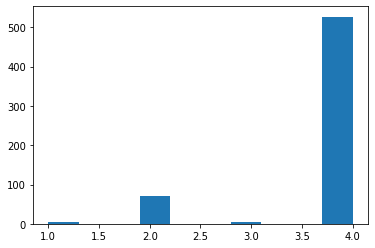

In [ ]:
plt.hist(merge_inner.topic)
plt.show()

In [ ]:
## 클래스별 불균형 / 정확한 분류가 되었다고 판단할 수 없음.
## Topic #5	침대, 문, 사용, 커피, 냉장고, 침실, 깔끔, 거실, 수건, 들어가다, 테이블, 편하다, 조명, 따로, 예쁘다, 쪽, 인테리어, 주차, 식기, 샴푸

In [ ]:
tomotopy

NameError: ignored

# 가중치 정책 변경

## TF-IDF

In [131]:
model = tp.LDAModel(k=10, alpha=0.1, eta=0.01, min_cf=5, rm_top=30, tw=tp.TermWeight.IDF)
# LDAModel을 생성
# 토픽의 개수(k)는 20개, alpha 파라미터는 0.1, eta 파라미터는 0.01
# 전체 말뭉치에 5회 미만 등장한 단어들은 제거

In [132]:
for row in all_items.content:
    model.add_doc(row) # 행 별로 model에 추가합니다.

In [48]:
# model의 num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고
# 학습 준비만 시킵니다.
# num_words, num_vocabs에 관심 없다면 이부분은 생략해도 됩니다.
model.train(0) 
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)

Total docs: 4342
Total words: 745202
Vocab size: 10368


In [133]:
# 다음 구문은 train을 총 200회 반복하면서, 
# 매 단계별로 로그 가능도 값을 출력해줍니다.
# 혹은 단순히 model.train(200)으로 200회 반복도 가능합니다.
for i in range(200):
    print('Iteration {}\tLL per word: {}'.format(i, model.ll_per_word))
    model.train(3)

Iteration 0	LL per word: 0.0
Iteration 1	LL per word: -9.98611191652855
Iteration 2	LL per word: -9.623644480774741
Iteration 3	LL per word: -9.463167923771515
Iteration 4	LL per word: -9.36528606034846
Iteration 5	LL per word: -9.299666556056764
Iteration 6	LL per word: -9.247962127224017
Iteration 7	LL per word: -9.212528097939762
Iteration 8	LL per word: -9.182220482221707
Iteration 9	LL per word: -9.158262662285532
Iteration 10	LL per word: -9.134861138948828
Iteration 11	LL per word: -9.11501754949233
Iteration 12	LL per word: -9.095542339339614
Iteration 13	LL per word: -9.073476471644327
Iteration 14	LL per word: -9.054246345413036
Iteration 15	LL per word: -9.036390721190886
Iteration 16	LL per word: -9.017784242999966
Iteration 17	LL per word: -9.00181415239283
Iteration 18	LL per word: -8.989519443063749
Iteration 19	LL per word: -8.972165506602105
Iteration 20	LL per word: -8.956953922740547
Iteration 21	LL per word: -8.945380487563856
Iteration 22	LL per word: -8.9307889447

In [134]:
model.save('TF-IDF_model.bin')

In [50]:
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model.k):
    # 토픽 개수가 총 20개이니, 0~19번까지의 토픽별 상위 단어 10개를 뽑아봅시다.
    res = model.get_topic_words(i, top_n=20)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	한옥, 별채, 마당, 책, 안채, 시골집, 한옥스테, 안목, 전통, 석식, 고즈넉, 매력, 한옥스테이, 사랑채, 마루, 소, 현대, 본채, 댁, 편안
Topic #1	기록, 실시간, 국내, 비애, 출처, 경기도, 민박, 여행지, 비수기, 경상북도, 미학, 숲, 마을, 핫, ᆸ, 프다, ᆷ, 경남, 제작, 상품권
Topic #2	수영장, 오션뷰, 리조트, 스파, 풀장, 일출, 물놀이, 다이빙, 블루, 인피니티, 야외, 기장, 바라보다, 카루나, 수풀, 일몰, 테라스, 개별, 노을, 충남
Topic #3	굽다, 오빠, 자쿠지, 남편, 탕, 도착, 놀다, 온도, 날씨, 밥, 수영장, 못, 새우, 메뉴, 적정, 삼겹살, 노을, 음료, 남자, 도토리
Topic #4	정원, 가족, 풍경, 귤, 아기, 엄마, 꽃, 밭, 멋지다, 애, 만나다, 아름답다, 눈, 수국, 편안, 언니, 촬영, 아빠, 시작, 잔디
Topic #5	테이블, 편하다, 욕실, 쪽, 마당, 조명, 불편, 부엌, 밖, 놓이다, 계단, 입구, 넉넉, 모습, 샤워, 따로, 침구, 창문, 의자, 식탁
Topic #6	와인, 요기, 잔, 파티, 틀다, 배달, 맥주, 이거, 짱, 그릇, 벌레, 욕조, 칫솔, 챙기다, 완벽, 술, 컵, 병, 티비, 트다
Topic #7	숙박, 오션뷰, 네이버, 유명, 욕조, 마감, 실, 참고, 불가, 선택, 성비, 저렴, 금액, 일정, 해변, 공유, 요금, 오후, 제공, 후기
Topic #8	캠핑, 라운드, 카라, 캠프, 폴리, 화담, 강화도, 핑, 글램, 기네스, 호스텔, 글램핑, 텐트, 베이스, 만송재, 카라반, 드렌도트, 선인장, 별장, 별서
Topic #9	인터뷰, 아날로그, 오두막, 모포, 로컬, 한적, 매듭, 스무, 아날로그스테이, 라피아, 불멍, 까망감스테이, 치앙마이, 히노끼탕, 토투, 아날로그스테, 칠천도, 라인, 탕, 숲


In [ ]:
# calculate coherence using preset

for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
    coh = tp.coherence.Coherence(model, coherence=preset, )
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]
    print('==== Coherence : {} ===='.format(preset))
    print('Average:', average_coherence)
    print()

==== Coherence : u_mass ====
Average: -7.618230804392676

==== Coherence : c_uci ====
Average: -3.692237754792612

==== Coherence : c_npmi ====
Average: -0.08127343536076931

==== Coherence : c_v ====
Average: 0.6995148056373



In [ ]:
model_list = {}
for num_topics in range(3, 31, 1):
  model_list['model_{}'.format(num_topics)] = tp.LDAModel(k=num_topics, alpha=0.1, eta=0.01, min_cf=3, rm_top=10, tw=tp.TermWeight.IDF)

In [ ]:
for k, v in model_list.items():
  print(k)

In [ ]:
for k, v in model_list.items():
  for row in all_items.content:
          model_list[k].add_doc(row) # 행 별로 model에 추가합니다.

In [ ]:
# model의 num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고
# 학습 준비만 시킵니다.
# num_words, num_vocabs에 관심 없다면 이부분은 생략해도 됩니다.
for k, v in model_list.items():
  model_list[k].train(0) 
  print('Total docs:', len(model_list[k].docs))
  print('Total words:', model_list[k].num_words)
  print('Vocab size:', model_list[k].num_vocabs)

In [ ]:
# 다음 구문은 train을 총 200회 반복하면서, 
# 매 단계별로 로그 가능도 값을 출력해줍니다.
# 혹은 단순히 model.train(200)으로 200회 반복도 가능합니다.
for k, v in model_list.items():
  model_list[k].train(200) 

In [ ]:
# calculate coherence using preset

max_coherence = 0

for k, v in model_list.items(): 
  coh = tp.coherence.Coherence(model_list[k], coherence='c_v', )
  average_coherence = coh.get_score()
  if average_coherence >= max_coherence:
    max_coherence = average_coherence
    model_num = k
  print('==== Coherence : {} ===='.format(k))
  print('Average:', average_coherence)
  print()
print('best_model_num:', model_num)
print('max_coherence:', max_coherence)

In [ ]:
best_model = model_list['model_26']

# 문헌별 토픽 분류

In [ ]:
len(model.docs)

4342

In [ ]:
# 먼저 토픽 개수만큼 공간을 만들어줍니다.
buckets = [[] for _ in range(best_model.k)]
# 전체 문헌에 대해, top 1 주제 번호를 찾아 그 그룹에 해당 문헌을 포함시킵니다.
for i, d in enumerate(best_model.docs):
    buckets[d.get_topics(top_n=1)[0][0]].append([i,d])

In [ ]:
topic_table = pd.DataFrame() #테이블 생성
doc_index = []
content = []
topics = []
item_idx = []

for i in range(len(best_model.docs)): # 인덱스별 값을 개별 변수로 테이블에 배정
  doc_index = int(i)
  content = all_items.content[i]
  item_idx = all_items.item_idx[i]
  topics = int(best_model.docs[i].get_topics(top_n=1)[0][0])
  topic_table = topic_table.append(pd.Series([doc_index,item_idx, content, topics]), ignore_index=True)

In [ ]:
topic_table

,0,1,2,3
0,0.0,0.0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다...",12.0
1,1.0,1.0,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상...",18.0
2,2.0,2.0,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플...",1.0
3,3.0,3.0,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ...",21.0
4,4.0,4.0,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ...",21.0
...,...,...,...,...
4337,4337.0,NaN,"[국내, 여행지, 여행, 맨션자두, 들어가다, 커다랗다, 널판지, 깔다, 발, 편하...",18.0
4338,4338.0,NaN,"[영이, 분기, 여행, 스테이솔, 여행지, 영이, 퇴근, 오빠, 먼저, 카페, 데이...",23.0
4339,4339.0,NaN,"[다귀, 쉼터, 오늘, 하얗다, 외관, 매듭, 스무, 시장, 포장, 시장, 네비찍,...",7.0
4340,4340.0,NaN,"[아파트먼트, 여행, 자주, 불구, 잡다, 놀다, 처음, 고르다, 급하다, 잡다, ...",7.0


In [ ]:
topic_table.columns = ['doc_index','item_index', 'content', 'topic']

In [ ]:
topic_table = pd.DataFrame(topic_table)

In [ ]:
topic_table.content[0]

In [ ]:
insta_data.columns = ['item_index', 'content', 'date', 'like', 'tags', 'name', 'overlap', 'place']

In [ ]:
insta_data

,item_index,content,date,like,tags,name,overlap,place
0,0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다...",2021-09-06,39,"['#데일리감성속초로', '#데일리감성_속초강원도', '#데일리감성_강원——————...",파도의무늬,1,NaN
1,1,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상...",2021-09-03,12,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",스테이 시호일,1,NaN
2,2,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플...",2021-09-03,33,"['#데일리감성제주도', '#데일리감성_제주—————————————————']",까만돌멩이,1,제주특별자치도 제주시 구좌읍 계룡길 32
3,3,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ...",2021-09-02,36,"['#데일리감성단양으로', '#데일리감성_단양충청북도', '#데일리감성_충북————...",권장사양,1,NaN
4,4,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ...",2021-09-01,24,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",라온가,1,NaN
...,...,...,...,...,...,...,...,...
604,604,"[폭, 그림, 오션뷰, 액자, 창문, 너머, 바다, 감성숙소랍니돠, 미니멀리즘, 추...",2021-06-24,142,"['#제주', '#솔트', '#제주숙소', '#제주여행', '#제주숙소추천', '#...",솔트,2,NaN
605,605,"[리버뷰, 피그멜리온이펙, 트다, 리버, 마운틴뷰, 월풀스파, 즐기다, 뷰맛, 원룸...",2021-06-15,87,"['#춘천', '#피그멜리온이펙트', '#춘천숙소', '#춘천여행', '#춘천숙소추...",피그멜리온이펙트,2,강원도 춘천시 서면 경춘로 405
606,606,"[시골, 동네, 오붓, 편안, 밤, 논밭뷰, 여유, 만끽, 힐링, 게스트하우스, 사...",2021-04-21,68,"['#곡성', '#품안의밤', '#곡성숙소', '#곡성여행', '#곡성숙소추천', ...",품안의밤,2,NaN
607,607,"[다녀오다, 웨딩촬영지, 유명, 더브리앙, 뜨다, 화이트, 앤, 우드, 톤, 좋아하...",2021-04-19,57,"['#강릉', '#더브리앙뜨', '#강릉숙소', '#강릉여행', '#강릉데이트', ...",더브리앙뜨,2,강원도 강릉시 사천면 중앙서로 92-43


In [ ]:
merge_inner = pd.merge(topic_table, insta_data, on='item_index')

In [ ]:
merge_inner.drop('content_y', axis=1, inplace=True)

In [ ]:
merge_inner.topic = merge_inner.topic.astype('str')

In [ ]:
merge_inner

,doc_index,item_index,content_x,topic,date,like,tags,name,overlap,place
0,0.0,0.0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다...",12.0,2021-09-06,39,"['#데일리감성속초로', '#데일리감성_속초강원도', '#데일리감성_강원——————...",파도의무늬,1,NaN
1,1.0,1.0,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상...",18.0,2021-09-03,12,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",스테이 시호일,1,NaN
2,2.0,2.0,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플...",1.0,2021-09-03,33,"['#데일리감성제주도', '#데일리감성_제주—————————————————']",까만돌멩이,1,제주특별자치도 제주시 구좌읍 계룡길 32
3,3.0,3.0,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ...",21.0,2021-09-02,36,"['#데일리감성단양으로', '#데일리감성_단양충청북도', '#데일리감성_충북————...",권장사양,1,NaN
4,4.0,4.0,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ...",21.0,2021-09-01,24,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",라온가,1,NaN
...,...,...,...,...,...,...,...,...,...,...
603,603.0,604.0,"[폭, 그림, 오션뷰, 액자, 창문, 너머, 바다, 감성숙소랍니돠, 미니멀리즘, 추...",21.0,2021-06-24,142,"['#제주', '#솔트', '#제주숙소', '#제주여행', '#제주숙소추천', '#...",솔트,2,NaN
604,604.0,605.0,"[리버뷰, 피그멜리온이펙, 트다, 리버, 마운틴뷰, 월풀스파, 즐기다, 뷰맛, 원룸...",19.0,2021-06-15,87,"['#춘천', '#피그멜리온이펙트', '#춘천숙소', '#춘천여행', '#춘천숙소추...",피그멜리온이펙트,2,강원도 춘천시 서면 경춘로 405
605,605.0,606.0,"[시골, 동네, 오붓, 편안, 밤, 논밭뷰, 여유, 만끽, 힐링, 게스트하우스, 사...",21.0,2021-04-21,68,"['#곡성', '#품안의밤', '#곡성숙소', '#곡성여행', '#곡성숙소추천', ...",품안의밤,2,NaN
606,606.0,607.0,"[다녀오다, 웨딩촬영지, 유명, 더브리앙, 뜨다, 화이트, 앤, 우드, 톤, 좋아하...",21.0,2021-04-19,57,"['#강릉', '#더브리앙뜨', '#강릉숙소', '#강릉여행', '#강릉데이트', ...",더브리앙뜨,2,강원도 강릉시 사천면 중앙서로 92-43


In [ ]:
merge_inner.topic.value_counts()

21.0    331
19.0    137
18.0     46
4.0      23
2.0       9
11.0      7
17.0      6
16.0      5
12.0      5
9.0       4
25.0      4
0.0       4
3.0       4
24.0      3
22.0      3
10.0      3
5.0       3
1.0       3
8.0       2
13.0      2
14.0      1
7.0       1
15.0      1
23.0      1
Name: topic, dtype: int64

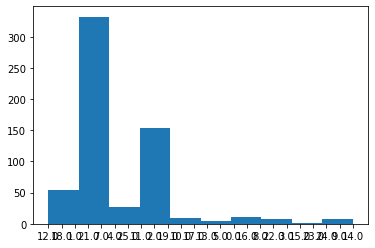

In [ ]:
plt.hist(merge_inner.topic)
plt.show()

## PMI

In [135]:
model = tp.LDAModel(k=10, alpha=0.1, eta=0.01, min_cf=3, rm_top=10, tw=tp.TermWeight.PMI )
# LDAModel을 생성
# 토픽의 개수(k)는 20개, alpha 파라미터는 0.1, eta 파라미터는 0.01
# 전체 말뭉치에 5회 미만 등장한 단어들은 제거

In [136]:
for row in all_items.content:
    model.add_doc(row) # 행 별로 model에 추가합니다.

In [113]:
# model의 num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고
# 학습 준비만 시킵니다.
# num_words, num_vocabs에 관심 없다면 이부분은 생략해도 됩니다.
model.train(0) 
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)

Total docs: 4340
Total words: 816295
Vocab size: 14712


In [ ]:
# 다음 구문은 train을 총 200회 반복하면서, 
# 매 단계별로 로그 가능도 값을 출력해줍니다.
# 혹은 단순히 model.train(200)으로 200회 반복도 가능합니다.
for i in range(200):
    print('Iteration {}\tLL per word: {}'.format(i, model.ll_per_word))
    model.train(3)

In [138]:
model.save('PMI_model.bin')

In [116]:
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model.k):
    # 토픽 개수가 총 20개이니, 0~19번까지의 토픽별 상위 단어 10개를 뽑아봅시다.
    res = model.get_topic_words(i, top_n=20)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	한옥, 온도, 적정, 한옥스테, 솔, 블루, 한옥스테이, 유숙, 연가, 고즈넉, 촌, 전통, 현대, 황토, 마당, 편백, 한복, 치앙마이, 서재, 즐기다
Topic #1	정원, 풍경, 느끼다, 가족, 민박, 마을, 멋지다, 머물다, 편안, 분위기, 마당, 나무, 마음, 모습, 다락방, 별채, 꽃, 가득, 인테리어, 너무나
Topic #2	남편, 날씨, 막, 고양이, 놀다, 동생, 엄마, 아날로그, 캠프, 오빠, 바람, 코로나, 벌레, 불, 도토리, 불다, 부부, 흐리다, 오후, 이거
Topic #3	침실, 거실, 사용, 커피, 문, 테이블, 편하다, 조명, 쪽, 따로, 냉장고, 거울, 부엌, 입구, 수건, 주차, 불편, 거리, 식기, 세면대
Topic #4	바베큐, 수영장, 굽다, 캠핑, 자쿠지, 탕, 라운드, 야외, 인터뷰, 숯, 물놀이, 폴리, 불, 바비큐, 테라스, 히노끼탕, 다이빙, 놀다, 튜브, 숯불
Topic #5	스파, 제공, 숲, 미학, 숙박, 공휴일, 제제, 석식, 현재, 식당, 책, 전라북도, 음료, 네이버, 금액, 온, 리, 유온, 스테이폴리, 생활
Topic #6	한적, 촬영, 파티, 애, 안목, 친구, 귤, 해변, 늘, 해수욕장, 밭, 오늘, 체험, 탕, 서점, 노곤, 남편, 팜, 지역, 홍대
Topic #7	이쁘다, 넘다, 맛있다, 친구, 요기, 귀엽다, 도착, 못, 언니, 술, 저녁, 최고, 짱, 친절, 이거, 동쪽, 남자, 공항, 오빠, 마지막
Topic #8	즐기다, 수영장, 국내, 실시간, 기록, 바다, 오션뷰, 비애, 여행지, 경남, 출처, 힐링, 바라보다, 느끼다, 핫, 가족, 비수기, 탕, 야외, 보내다
Topic #9	바다, 오션뷰, 리조트, 욕조, 마음, 이야기, 테라스, 요즘, 바닷가, 아래, 여관, 하루, 없이, 잇다, 여름, 강화도, 알아보다, 더욱, 섬, 야경


# 문헌별 토픽 분류

In [ ]:
# 먼저 토픽 개수만큼 공간을 만들어줍니다.
buckets = [[] for _ in range(model.k)]
# 전체 문헌에 대해, top 1 주제 번호를 찾아 그 그룹에 해당 문헌을 포함시킵니다.
for i, d in enumerate(model.docs):
    buckets[d.get_topics(top_n=1)[0][0]].append([i,d])

In [ ]:
topic_table = pd.DataFrame() #테이블 생성
doc_index = []
content = []
topics = []
item_idx = []

for i in range(len(model.docs)): # 인덱스별 값을 개별 변수로 테이블에 배정
  doc_index = int(i)
  content = all_items.content[i]
  item_idx = all_items.item_idx[i]
  topics = int(model.docs[i].get_topics(top_n=1)[0][0])
  topic_table = topic_table.append(pd.Series([doc_index,item_idx, content, topics]), ignore_index=True)

In [ ]:
topic_table.columns = ['doc_index','item_index', 'content', 'topic']

In [ ]:
topic_table = pd.DataFrame(topic_table)

In [ ]:
insta_data.columns = ['item_index', 'content', 'date', 'like', 'tags', 'name', 'overlap', 'place']

In [ ]:
merge_inner = pd.merge(topic_table, insta_data, on='item_index')

In [ ]:
merge_inner.drop('content_y', axis=1, inplace=True)

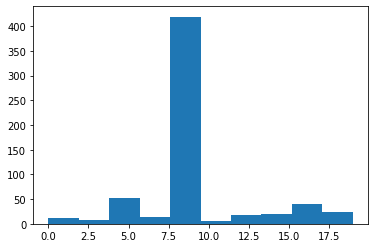

In [ ]:
plt.hist(merge_inner.topic)
plt.show()

# Infer 새로운 문서 추론

In [ ]:
unseen_words = '전주 한옥마을의 고풍스러운 한옥에서 소중한 추억을 선물 받을수 있는 "다락" 시골 할머니집에 놀러온듯한 느낌을 주는 아늑하면서 포근한 공간이다..전통적인 한옥을 경험해볼수 있는 다락1과 모던함과 한옥을 잘 어우러지도록 만든 다락2로 구성되어있으며 2인실부터 6인실까지 다양하게 갖춰져있어서 친구, 연인, 가족들과 함께 취향대로 골라갈수 있다. 마루에 앉아 정성스레 꾸며진 정원을 바라보며 도란도란 이야기 나누기 좋은 공간..아기자기한 소품 안에서는 주인장의 감성을 담아 더욱 옛스러움을 느낄수 있는 공간. 한옥마을 안 경기전 옆에 위치해 있기때문에 주변 관광하기에도 좋다'

In [ ]:
unseen_words = unseen_words.strip().split()

In [ ]:
unseen_words

In [ ]:
# mdl = tp.LDAModel(k=20)
# # add_doc ...
# mdl.train(100)
doc_inst = best_model.make_doc(unseen_words)
topic_dist, ll = best_model.infer(doc_inst, iter=200)
print("Topic Distribution for Unseen Docs: ", topic_dist)
print("Log-likelihood of inference: ", ll)

Topic Distribution for Unseen Docs:  [0.01004239 0.09352702 0.01014526 0.00855952 0.01207882 0.00663959
 0.02324726 0.20003536 0.005305   0.017077   0.04716712 0.01270095
 0.00343213 0.00743489 0.01289017 0.01138204 0.00528442 0.0093564
 0.18760568 0.01968418 0.15118648 0.02205014 0.00850216 0.08709914
 0.02254611 0.0050209 ]
Log-likelihood of inference:  0.0


In [ ]:
doc_inst.get_topics()[0][0]

7

In [ ]:
unseen_text = input('문서를 입력하세요')
unseen_text = unseen_text.strip().split()
doc_inst = best_model.make_doc(unseen_text)
topic_dist, ll = best_model.infer(doc_inst, iter=200)
print("이 문서의 카테고리는 {}번입니다.".format(doc_inst.get_topics()[0][0]))

문서를 입력하세요'전주 한옥마을의 고풍스러운 한옥에서 소중한 추억을 선물 받을수 있는 "다락" 시골 할머니집에 놀러온듯한 느낌을 주는 아늑하면서 포근한 공간이다..전통적인 한옥을 경험해볼수 있는 다락1과 모던함과 한옥을 잘 어우러지도록 만든 다락2로 구성되어있으며 2인실부터 6인실까지 다양하게 갖춰져있어서 친구, 연인, 가족들과 함께 취향대로 골라갈수 있다. 마루에 앉아 정성스레 꾸며진 정원을 바라보며 도란도란 이야기 나누기 좋은 공간..아기자기한 소품 안에서는 주인장의 감성을 담아 더욱 옛스러움을 느낄수 있는 공간. 한옥마을 안 경기전 옆에 위치해 있기때문에 주변 관광하기에도 좋다'
이 문서의 카테고리는 7번입니다.
